In [108]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score


# Importing dataset
df = pd.read_csv('CS418_DS.csv')
display(df)

# Cleaning data
df = df.drop(['COMMENT_ID'], axis=1)

# Converting comments into numbers
cv_model = CountVectorizer()
cv_model.fit(df['CONTENT'])
x = cv_model.transform(df['CONTENT'])

train_x, test_x, train_y, test_y = train_test_split(x, df['CLASS'], test_size=0.20, random_state=57)


#LR Model
LR_model = LogisticRegressionCV(Cs=np.logspace(-10,10,21),penalty = 'l2',solver='liblinear',cv=3)
LR_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
LR_pred = LR_model.predict(test_x)

# Get predictions for spam comments using train data
LR_pred_training = LR_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, LR_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, LR_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, LR_pred))

cv = np.array(cross_val_score(LR_model, train_x, train_y, cv=3))

print('Cross validation scores:')
print(cv)

print('Accuracy:', accuracy_score(test_y, LR_pred))


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1133,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
1134,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
1135,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
1136,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


R-squared: 0.89
Mean squared error for training: 0.00
Mean squared error for testing: 0.03
Cross validation scores:
[0.97039474 0.96039604 0.92739274]
Accuracy: 0.9736842105263158


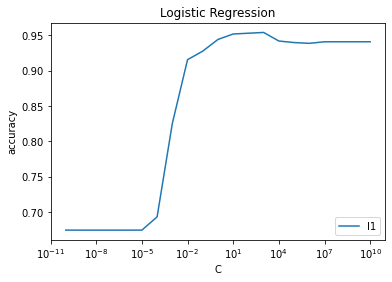

In [ ]:
plt.plot(LR_model.Cs_,list(LR_model.scores_.values())[0].mean(axis=0),label='l1')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.title('Logistic Regression')
plt.show()

In [110]:
dnew = pd.read_csv("Youtube05-Shakira.csv")
dnew = dnew.drop(['COMMENT_ID'], axis=1)
display(dnew)

cv_model = CountVectorizer()
cv_model.fit(dnew['CONTENT'])
x_before = cv_model.transform(dnew['CONTENT'])
cv_model.fit(dnew['AUTHOR'])
x2 = cv_model.transform(dnew['AUTHOR'])
x = hstack((x_before, x2))
y = dnew["CLASS"]

LR_model = LogisticRegression(random_state=57)
LR_model.fit(x, y)

LR_pred = LR_model.predict(x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(y, LR_pred))

# Print the mean squared error for training
print('Mean squared error for additional dataset : %.2f'% mean_squared_error(y, LR_pred))
print('Accuracy:', accuracy_score(y, LR_pred))


,AUTHOR,DATE,CONTENT,CLASS
0,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0
...,...,...,...,...
813,Dany PK,NaN,SUBSCRIBE TO MY CHANNEL X PLEASE!. SPARE,1
814,SmexyFriedChicken,NaN,Check out my videos guy! :) Hope you guys had ...,1
815,The Guy That's Done Everything,NaN,3 yrs ago I had a health scare but thankfully ...,1
816,Jesse Pinkman,2015-05-06T11:42:44.601000,Rihanna looks so beautiful with red hair ;)﻿,0


R-squared: 0.99
Mean squared error for additional dataset : 0.00
Accuracy: 0.9975550122249389


In [111]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.sparse import hstack
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn import tree


# Importing dataset
df = pd.read_csv('CS418_DS.csv')
display(df)

# Cleaning data
df = df.drop(['COMMENT_ID'], axis=1)


# Converting comments into numbers
cv_model = CountVectorizer()
cv_model.fit(df['CONTENT'])
x = cv_model.transform(df['CONTENT'])

train_x, test_x, train_y, test_y = train_test_split(x, df['CLASS'], test_size=0.20, random_state=57)


#LR Model
LR2_model = tree.DecisionTreeClassifier()
LR2_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
LR_pred = LR2_model.predict(test_x)

# Get predictions for spam comments using train data
LR_pred_training = LR2_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, LR_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, LR_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, LR_pred))

cv = np.array(cross_val_score(LR2_model, train_x, train_y, cv=3))

print('Cross validation scores:')
print(cv)

print('Accuracy:', accuracy_score(test_y, LR_pred))


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
1133,z13lvr4iupatjlrem231yvpxolzvspwdl,Salty Croc,2014-07-22T04:20:37.489000,Like this comment for no reason﻿,1
1134,z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k,Bob Orton,2014-07-22T00:26:50.820000,love this song﻿,0
1135,z12xhdjrsxm3v550w22oynsjrnmvjhkvj,LuckyMusiqLive,2014-07-21T22:25:54.048000,this song is awesome. these guys are the best....,1
1136,z13msngo3qvwx1ym223pehqgouexzdmnm,xXxPWND 420xXx,2014-07-21T11:05:51.945000,HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿,1


R-squared: 0.79
Mean squared error for training: 0.00
Mean squared error for testing: 0.05
Cross validation scores:
[0.92434211 0.92409241 0.93069307]
Accuracy: 0.9473684210526315


In [113]:
import sklearn.svm as s

s_model = s.SVC(kernel='sigmoid')
s_model.fit(train_x, train_y)

# Get predictions for spam comments using test data
LR_pred = s_model.predict(test_x)

# Get predictions for spam comments using train data
LR_pred_training = s_model.predict(train_x)

# Print the r-squared value
print('R-squared: %.2f' % r2_score(test_y, LR_pred))

# Print the mean squared error for training
print('Mean squared error for training: %.2f'% mean_squared_error(train_y, LR_pred_training))

# Print the mean squared error for testing
print('Mean squared error for testing: %.2f'% mean_squared_error(test_y, LR_pred))

cv = np.array(cross_val_score(s_model, train_x, train_y, cv=3))

print('Cross validation scores:')
print(cv)

print('Accuracy:', accuracy_score(test_y, LR_pred))


R-squared: 0.56
Mean squared error for training: 0.08
Mean squared error for testing: 0.11
Cross validation scores:
[0.90460526 0.91419142 0.90429043]
Accuracy: 0.8903508771929824
